<a href="https://colab.research.google.com/github/rajeevfromkrec/time-series/blob/master/TimeSeries_data%20data%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/jbrownlee/Datasets.git

Cloning into 'Datasets'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 274 (delta 12), reused 22 (delta 6), pack-reused 246
Receiving objects: 100% (274/274), 214.78 MiB | 41.38 MiB/s, done.
Resolving deltas: 100% (108/108), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
!ls

Datasets  sample_data


In [4]:
import os
import glob

In [5]:
os.listdir('Datasets')

['wheat-seeds.csv',
 'mammography.csv',
 'horse-colic.data',
 'adult.names',
 'oil-spill.names',
 'new-thyroid.csv',
 'monthly-car-sales.csv',
 'haberman.csv',
 'housing.names',
 'winequality-white.csv',
 'shampoo.csv',
 'breast-cancer-wisconsin.names',
 'mammography.names',
 'monthly-shampoo-sales.names',
 'wine.names',
 'auto-insurance.csv',
 'adult-train.csv',
 'german.csv',
 'oil-spill.csv',
 'housing.data',
 'monthly-robberies.csv',
 'daily-min-temperatures.csv',
 'phoneme.names',
 'airline-passengers.names',
 'abalone.csv',
 'monthly-mean-temp.csv',
 'banknote_authentication.csv',
 'daily-min-temperatures.names',
 'breast-cancer-wisconsin.csv',
 'glass.names',
 'daily-total-female-births.names',
 'pollution.names',
 'household_power_consumption.zip',
 'iris.csv',
 'adult-test.csv',
 'german.names',
 'longley.names',
 'ecoli.csv',
 'pollution.csv',
 'winequality.names',
 'breast-cancer.csv',
 'breast-cancer-wisconsin.data',
 'monthly-car-sales.names',
 'haberman.names',
 'IndoorMo

In [9]:
data=pd.read_csv('Datasets/daily-total-female-births.csv', index_col=[0],parse_dates=[0])

In [10]:
data.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [11]:
data.shape

(365, 1)

In [12]:
data_birth=data[0:364]

In [13]:
data.tail()

,Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


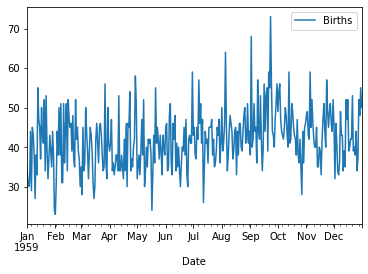

In [15]:
data.plot()

In [21]:
data_df=pd.DataFrame(data).

In [22]:
data_df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


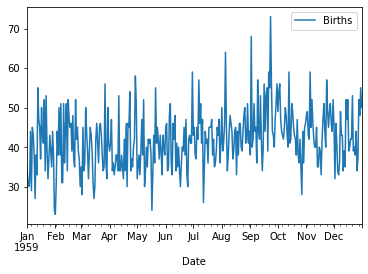

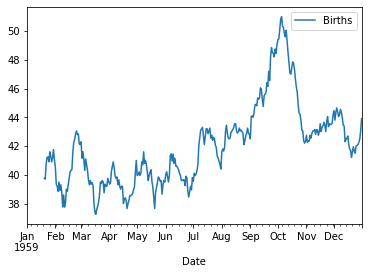

In [31]:
data.plot()
data.rolling(window=20).mean().plot()

In [19]:
print(data.values[:10])

[[35]
 [32]
 [30]
 [31]
 [44]
 [29]
 [45]
 [43]
 [38]
 [27]]


In [36]:
birth_df= pd.concat([data,data.shift(1)],axis=1)

In [37]:
birth_df.head()

,Births,Births
Date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [41]:
birth_df.columns=['births', 'birth_forecast']

In [42]:
birth_df.head()

,births,birth_forecast
Date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [47]:
birth_df=birth_df[1:365]

In [44]:
from sklearn.metrics import mean_squared_error

In [49]:
birth_error=mean_squared_error(birth_df.births, birth_df.birth_forecast)
birth_error

84.22252747252747

In [50]:
np.sqrt(birth_error)

9.177283229394606

In [52]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

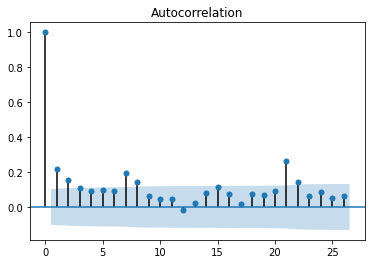

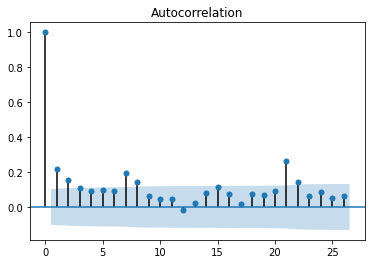

In [54]:
plot_acf(data)

In [55]:
train_data=data[1:330]
test_dat=data[330:]

In [56]:
from statsmodels.tsa.arima_model import ARIMA 

In [57]:
birth_model=ARIMA(train_data, order=(2,1,3))
birth_model_fit=birth_model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [58]:
birth_model_fit.aic

2225.004330713025

In [59]:
birth_forecast=birth_model_fit.forecast(steps=35)[0]

In [60]:
birth_forecast

array([45.31629667, 46.30979516, 43.62457226, 44.59411782, 46.50299079,
       44.32043336, 44.08045536, 46.35170007, 45.05794942, 43.86247023,
       45.95685344, 45.68527989, 43.9500254 , 45.45464969, 46.09901746,
       44.28629665, 44.98175266, 46.25824435, 44.77083952, 44.64611191,
       46.1829699 , 45.28815222, 44.50869654, 45.93985053, 45.73474797,
       44.57823731, 45.62032437, 46.0392169 , 44.81795761, 45.31706417,
       46.17215813, 45.16088842, 45.10403951, 46.14553264, 45.52909445])